<img src="https://raw.githubusercontent.com/paular143/images_notebooks/master/logo-sin-nombre.png" alt="Universidad de Los Andes" style="width: 90px;" align="left" frameborder="300"/>

**UNIVERSIDAD DE LOS ANDES** <br>
**FACULTAD DE ECONOMÍA** <br>
**TÓPICOS EN APRENDIZAJE DE MÁQUINAS** <br>

__Objetivo__: Introdución a la implementación e interpretación de árboles de clasificación.

In [1]:
import pandas as pd
import numpy as np

# Datos

In [2]:
data_iris= pd.read_csv(r'C:\Users\MIGUEL  CONTRERAS\Documents\UNIANDES\Semestre 4\Aprendizaje de máquinas\data_iris.csv').iloc[:,1:]

In [3]:
data_iris.columns= ['sepal_l','sepal_w','petal_l','petal_w','target']

In [4]:
data_iris.head()

,sepal_l,sepal_w,petal_l,petal_w,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
data_iris.tail()

,sepal_l,sepal_w,petal_l,petal_w,target
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [8]:
# Analizamos los tipos de las variables
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sepal_l  150 non-null    float64
 1   sepal_w  150 non-null    float64
 2   petal_l  150 non-null    float64
 3   petal_w  150 non-null    float64
 4   target   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Muestra de entrenamiento y evaluación.

In [9]:
from sklearn.model_selection import train_test_split # Para partir la base de datos en train y test

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data_iris.drop(columns=["target"]), data_iris.target, test_size=0.3, 
    random_state=123, stratify=data_iris.target)

In [12]:
x_train.shape

(105, 4)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
clf = DecisionTreeClassifier() # importar clasificador del arbol
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [15]:
x=np.random.random(1000)
x.sort()

In [16]:
import matplotlib.pyplot as plt

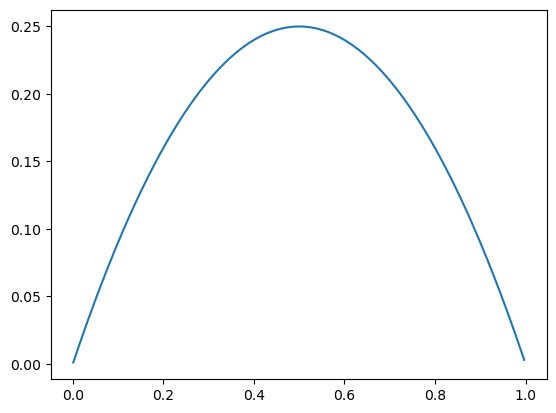

In [17]:
plt.plot(x,x*(1-x))

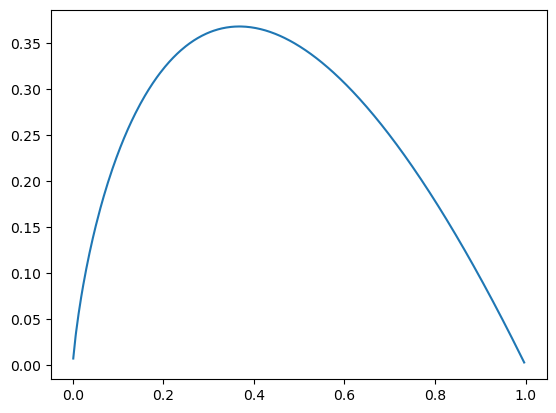

In [18]:
plt.plot(x,-x*np.log(x))

## Evaluación de modelo

In [19]:
from sklearn import metrics

In [20]:
y_hat = clf.predict(x_test)
y_hat_train = clf.predict(x_train)

In [21]:
metrics.confusion_matrix(y_test,y_hat)

array([[15,  0,  0],
       [ 0, 12,  3],
       [ 0,  2, 13]], dtype=int64)

In [22]:
metrics.accuracy_score(y_test,y_hat)

0.8888888888888888

In [23]:
metrics.confusion_matrix(y_train,y_hat_train)

array([[35,  0,  0],
       [ 0, 35,  0],
       [ 0,  0, 35]], dtype=int64)

In [24]:
y_test.unique()

array(['versicolor', 'virginica', 'setosa'], dtype=object)

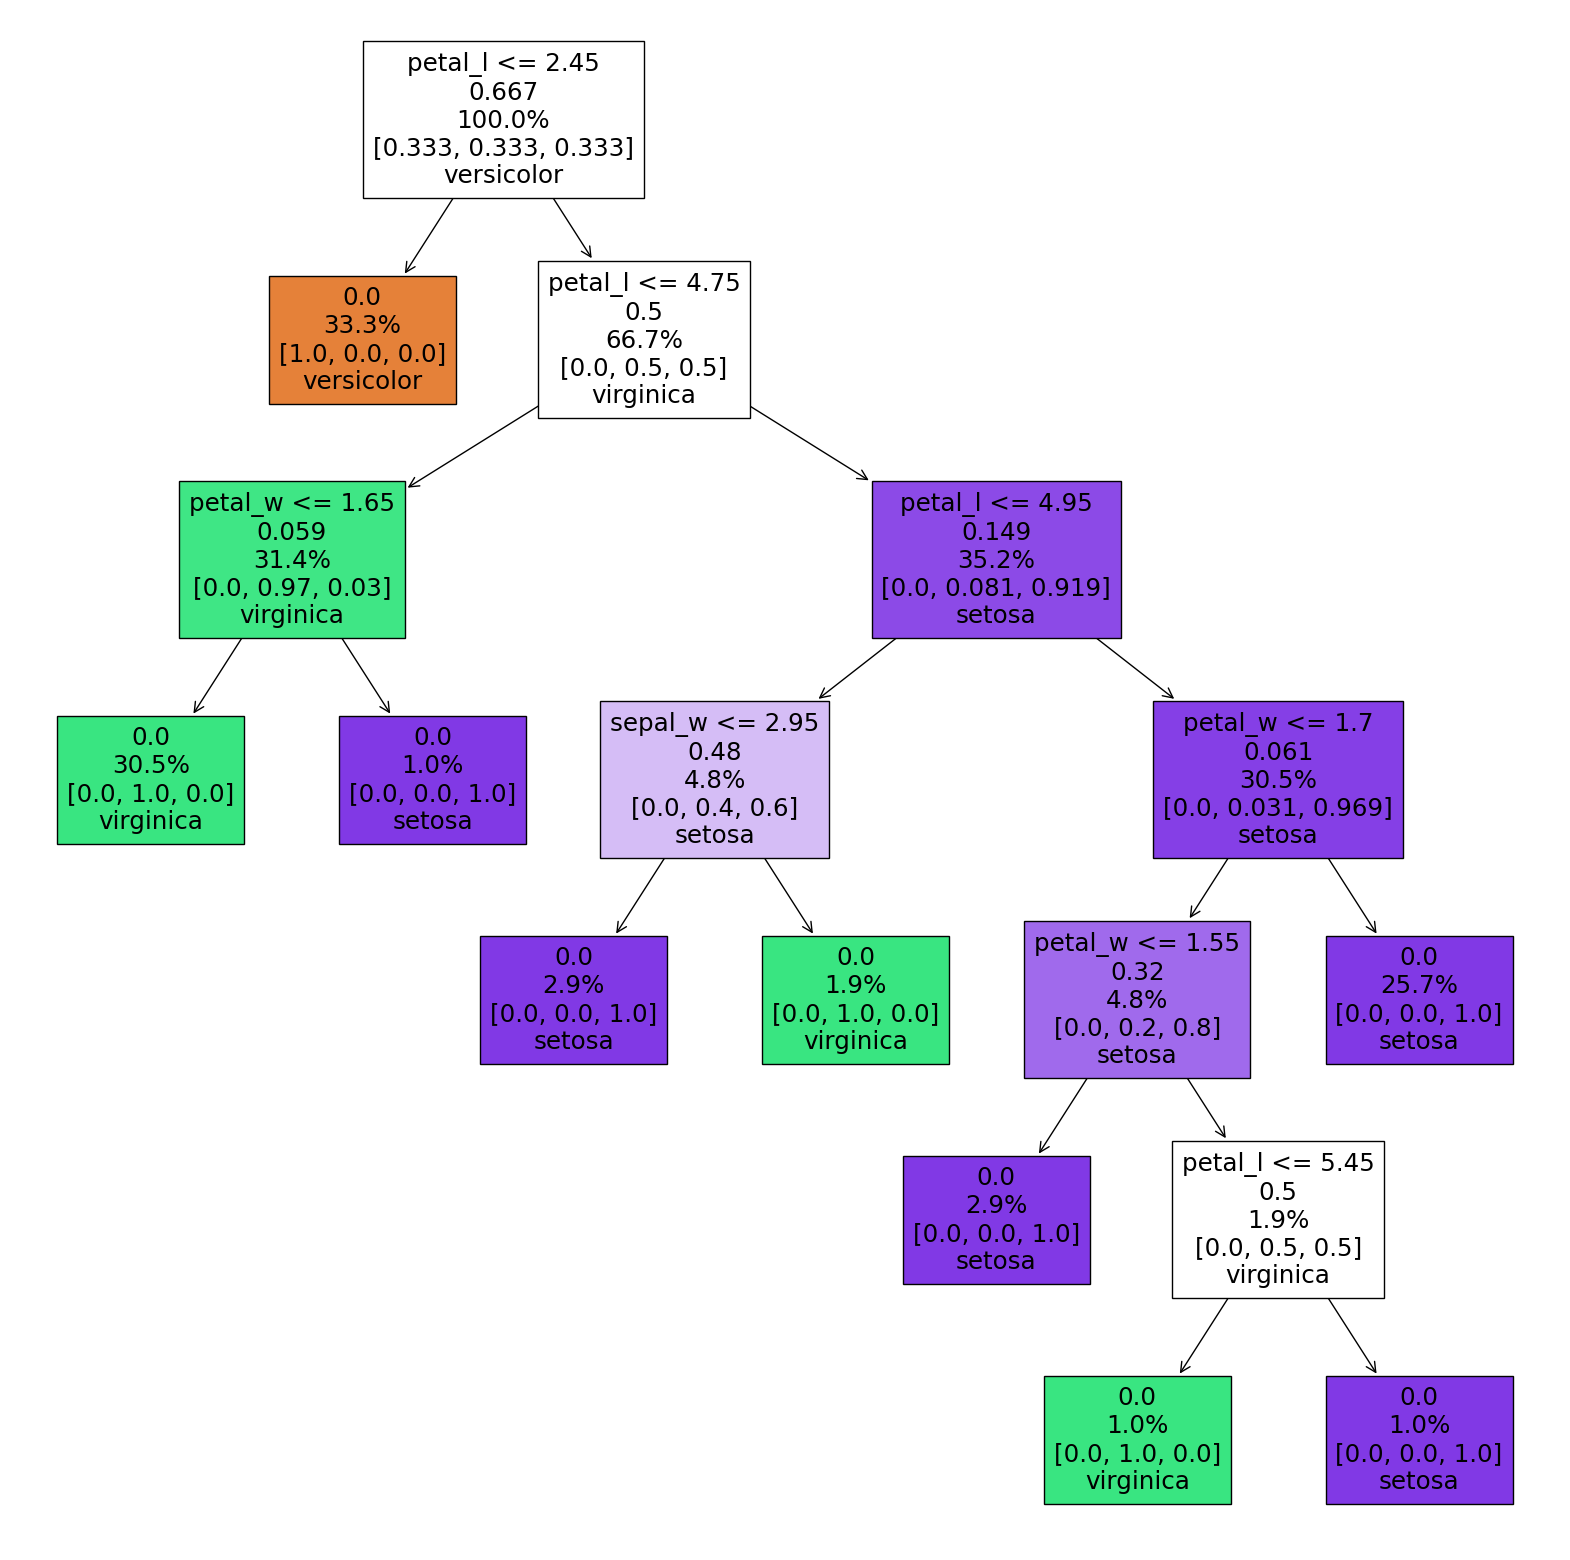

In [25]:
# Plotear
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20, 20))

tree.plot_tree(clf, feature_names=list(x_train.columns), 
               filled=True, label="none", proportion=True, class_names=['versicolor', 'virginica', 'setosa']);

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
## Corss-Validation

search_space_rf = [{
    'max_depth': [1,2, 3, 4, 5],
    'splitter': ['best', 'random'] 
}]

clf = GridSearchCV(DecisionTreeClassifier(random_state=123), search_space_rf, scoring="accuracy", cv=5
                   , verbose=4,return_train_score=True)
clf.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=1, splitter=best;, score=(train=0.667, test=0.667) total time=   0.0s
[CV 2/5] END max_depth=1, splitter=best;, score=(train=0.667, test=0.667) total time=   0.0s
[CV 3/5] END max_depth=1, splitter=best;, score=(train=0.667, test=0.667) total time=   0.0s
[CV 4/5] END max_depth=1, splitter=best;, score=(train=0.667, test=0.667) total time=   0.0s
[CV 5/5] END max_depth=1, splitter=best;, score=(train=0.667, test=0.667) total time=   0.0s
[CV 1/5] END max_depth=1, splitter=random;, score=(train=0.667, test=0.667) total time=   0.0s
[CV 2/5] END max_depth=1, splitter=random;, score=(train=0.667, test=0.667) total time=   0.0s
[CV 3/5] END max_depth=1, splitter=random;, score=(train=0.667, test=0.667) total time=   0.0s
[CV 4/5] END max_depth=1, splitter=random;, score=(train=0.655, test=0.667) total time=   0.0s
[CV 5/5] END max_depth=1, splitter=random;, score=(train=0.667, test=0.667) total time=   0.0s

In [41]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001995,2.431402e-07,0.001396,4.882468e-04,1,best,"{'max_depth': 1, 'splitter': 'best'}",0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.000000,9
1,0.001994,3.371748e-07,0.000997,3.234067e-07,1,random,"{'max_depth': 1, 'splitter': 'random'}",0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.000000,9
2,0.001396,4.887529e-04,0.001197,3.990889e-04,2,best,"{'max_depth': 2, 'splitter': 'best'}",0.952381,0.904762,0.952381,0.952381,0.904762,0.933333,0.023328,5
3,0.001407,4.909805e-04,0.001197,3.853462e-04,2,random,"{'max_depth': 2, 'splitter': 'random'}",0.809524,0.952381,0.857143,0.952381,0.714286,0.857143,0.090351,8
4,0.001808,4.054475e-04,0.001178,3.944488e-04,3,best,"{'max_depth': 3, 'splitter': 'best'}",0.904762,0.904762,0.857143,0.952381,1.000000,0.923810,0.048562,6
5,0.001600,4.702815e-04,0.001198,3.982090e-04,3,random,"{'max_depth': 3, 'splitter': 'random'}",0.904762,0.952381,0.952381,0.952381,1.000000,0.952381,0.030117,1
6,0.001789,3.962210e-04,0.001203,3.966239e-04,4,best,"{'max_depth': 4, 'splitter': 'best'}",0.904762,0.904762,0.952381,0.952381,1.000000,0.942857,0.035635,4
7,0.001984,1.413756e-05,0.001207,3.936340e-04,4,random,"{'max_depth': 4, 'splitter': 'random'}",0.904762,1.000000,0.952381,0.952381,0.952381,0.952381,0.030117,1
8,0.001789,3.963147e-04,0.001003,1.075730e-05,5,best,"{'max_depth': 5, 'splitter': 'best'}",0.904762,0.857143,0.857143,0.952381,1.000000,0.914286,0.055533,7
9,0.001390,4.943210e-04,0.000998,5.309834e-07,5,random,"{'max_depth': 5, 'splitter': 'random'}",0.904762,1.000000,0.904762,0.952381,1.000000,0.952381,0.042592,1


In [28]:
from sklearn import datasets

In [29]:
dataset= datasets.load_wine()

In [30]:
datos=pd.DataFrame(dataset.get('data'),columns=dataset['feature_names'])
datos

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0
